In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings;warnings.filterwarnings("ignore")

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# 散点图


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

   PID     county state   area  poptotal   popdensity  popwhite  popblack  \
0  561      ADAMS    IL  0.052     66090  1270.961540     63917      1702   
1  562  ALEXANDER    IL  0.014     10626   759.000000      7054      3496   
2  563       BOND    IL  0.022     14991   681.409091     14477       429   
3  564      BOONE    IL  0.017     30806  1812.117650     29344       127   
4  565      BROWN    IL  0.018      5836   324.222222      5264       547   

   popamerindian  popasian  ...  percprof  poppovertyknown  percpovertyknown  \
0             98       249  ...  4.355859            63628         96.274777   
1             19        48  ...  2.870315            10529         99.087145   
2             35        16  ...  4.488572            14235         94.956974   
3             46       150  ...  4.197800            30337         98.477569   
4             14         5  ...  3.367680             4815         82.505140   

   percbelowpoverty  percchildbelowpovert  percadultpove

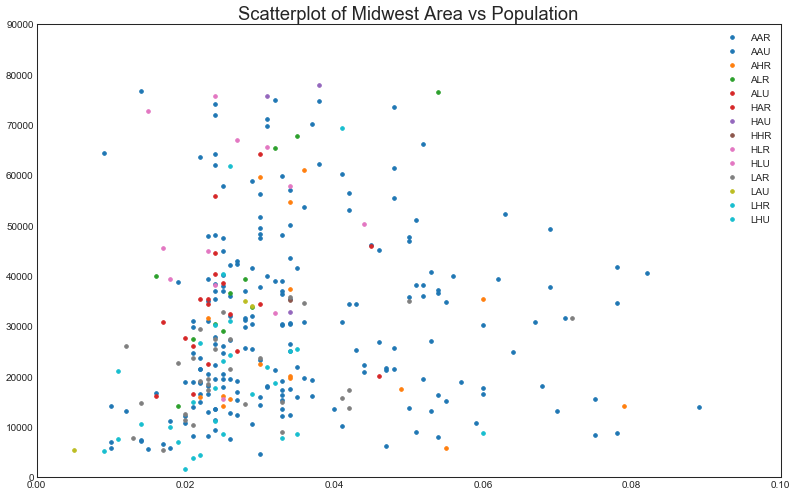

In [7]:
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")
print(midwest.head())
# Prepare Data 
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 60, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s=20, c=colors[i], label=str(category))

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    

# 2. 带边界的气泡图


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

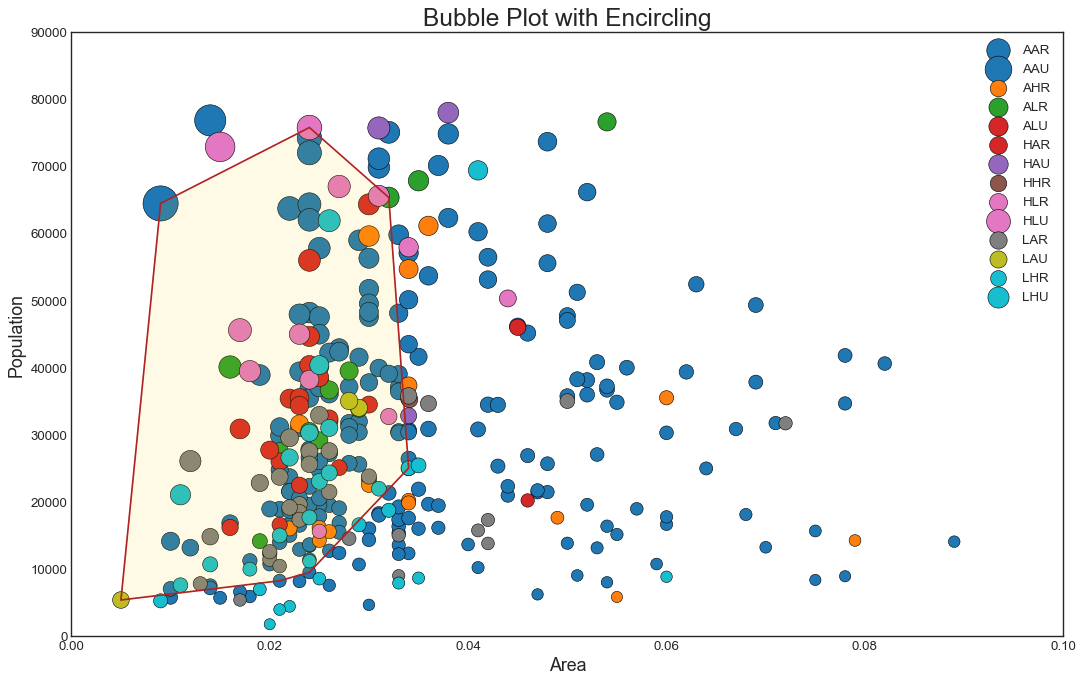

In [8]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")

# Step 1: Prepare Data
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')    

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], s='dot_size', c=colors[i], label=str(category), edgecolors='black', linewidths=.5)

# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                         

# Draw polygon surrounding vertices    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    

# 3、带线性回归最佳拟合线的散点图

Text(0.5, 1, 'Scatterplot with line of best fit grouped by number of cylinders')

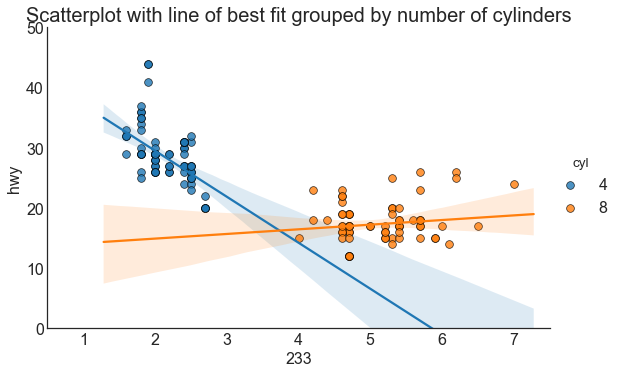

In [21]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy",hue="cyl",  data=df_select, 
                     size=5, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50),)
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)

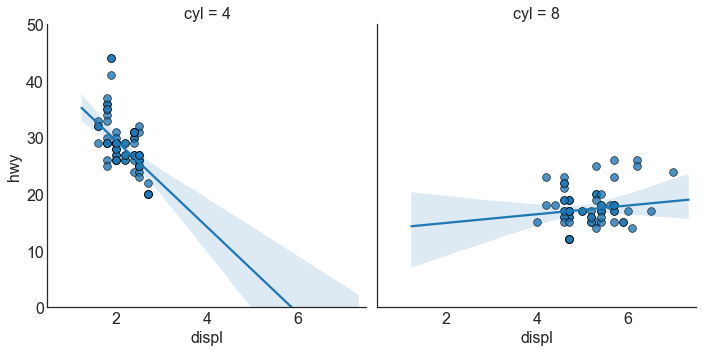

In [23]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# Each line in its own column
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", 
                     data=df_select, 
                     size=5, 
                     robust=True, 
                     palette='Set1', 
                     col="cyl",
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.show()

# 4. 抖动图


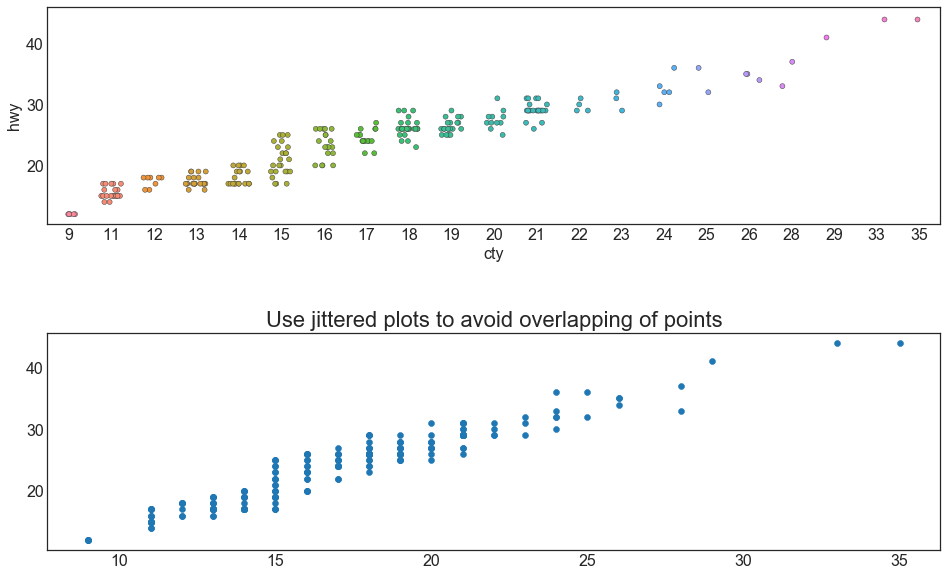

In [46]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
#subplots_adjust（left = None, bottom = None, right  = None, top = None, wsapce = None, hspace = None ）
# Draw Stripplot
fig=plt.figure(figsize=(16,10))
fig.subplots_adjust(hspace=0.5)
ax1=plt.subplot(2,1,1)    
sns.stripplot(df.cty, df.hwy, jitter=0.25, size=5, ax=ax1, linewidth=.5)
ax2=plt.subplot(2,1,2)    
plt.scatter(df.cty, df.hwy, linewidth=.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()

# 5. 计数图

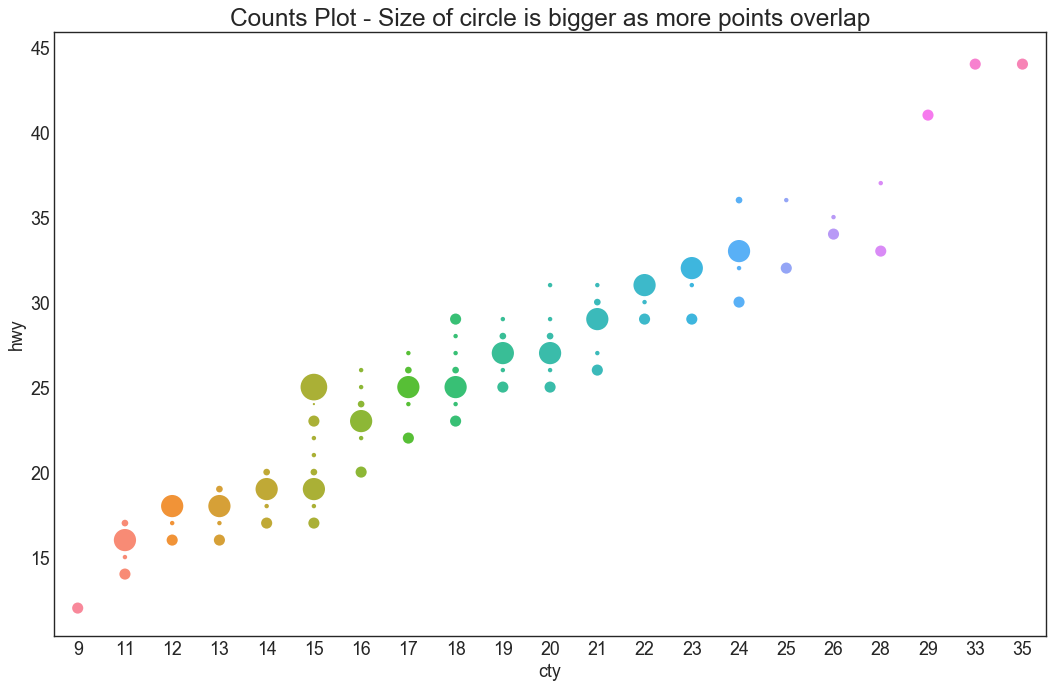

In [53]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df_counts.cty, df_counts.hwy, size=df_counts.counts*2, ax=ax)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

# 6. 边缘直方图

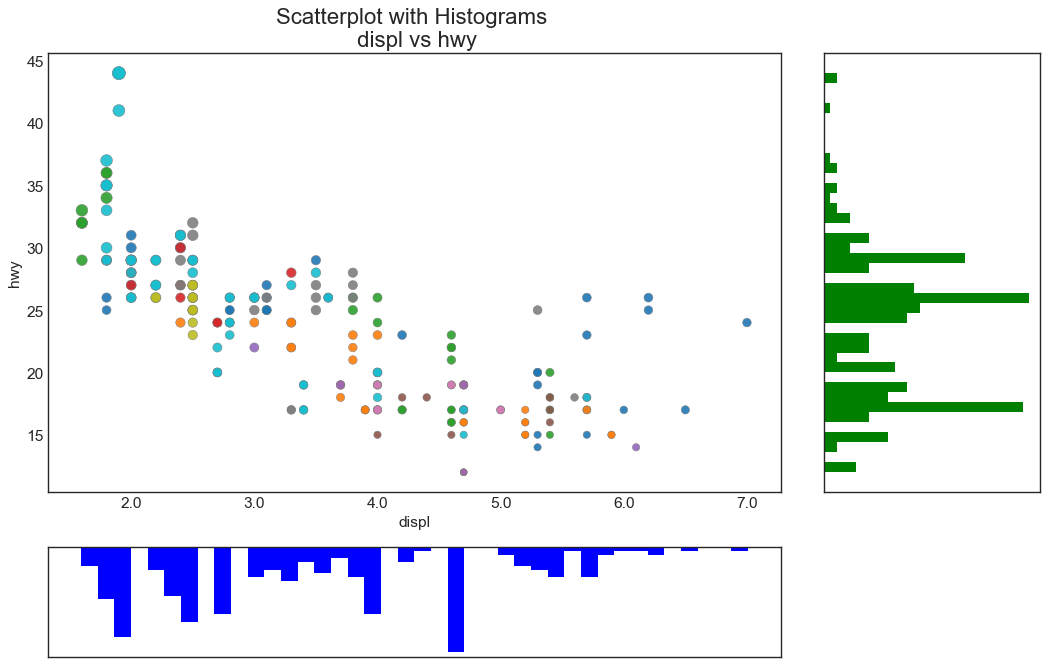

In [76]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*4, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="tab10", edgecolors='gray', linewidths=.5)

# histogram on the right
ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='blue')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='green')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()


# 7.边缘箱形图

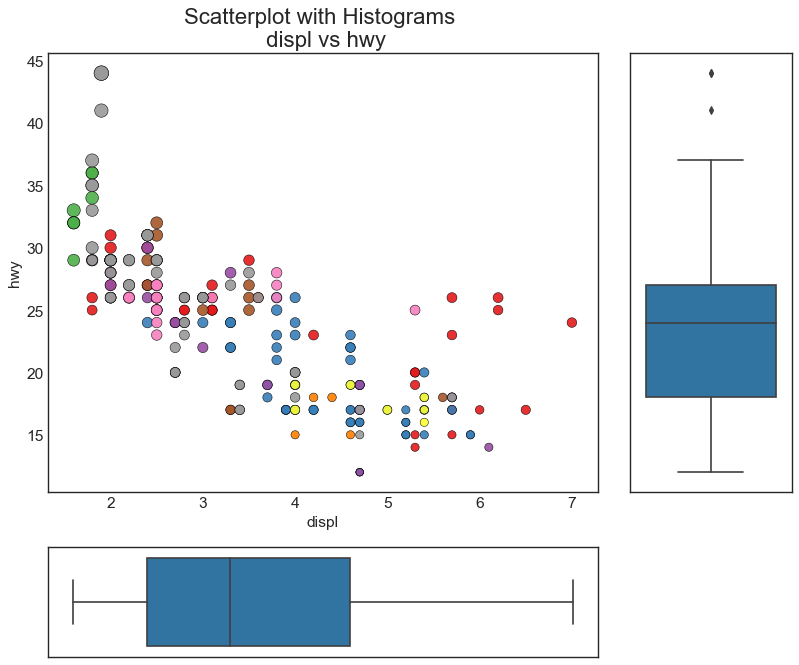

In [80]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(12, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*5, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)

# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v")
sns.boxplot(df.displ, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

# 8. 相关图

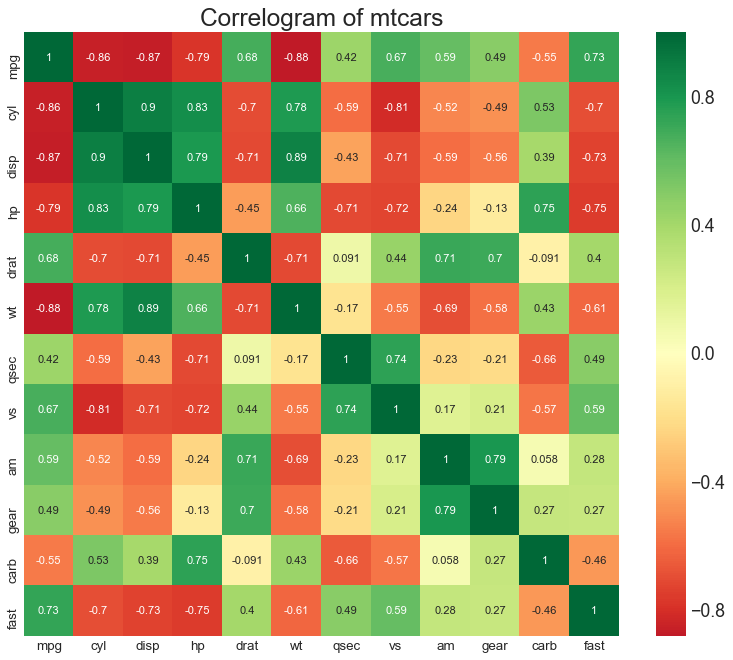

In [81]:
# Import Dataset
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 9. 矩阵图

<Figure size 800x640 with 0 Axes>

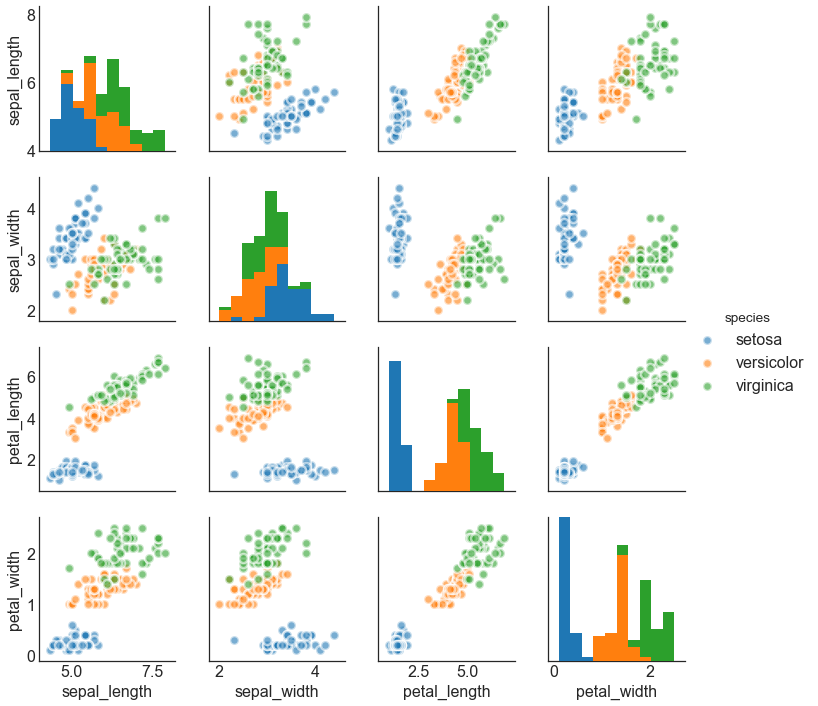

In [88]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="species",plot_kws=dict(alpha=0.6,s=80, edgecolor="white", linewidth=2.5)) #diag_kind ='kde'
plt.show()

<Figure size 800x640 with 0 Axes>

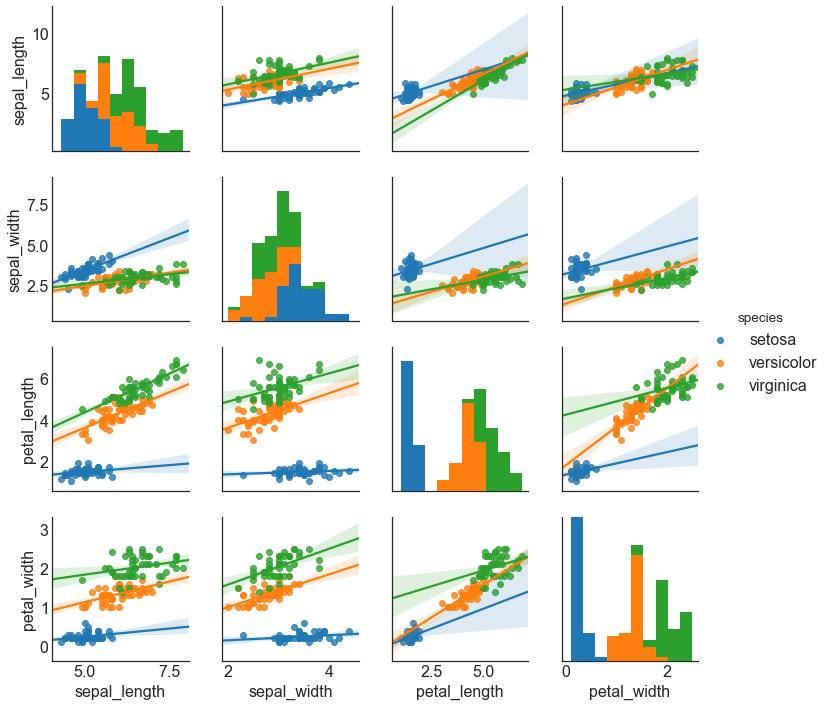

In [89]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="species")
plt.show()